# Descripción del Proyecto

Prepara un prototipo de un modelo de machine learning para Zyfra. La empresa desarrolla soluciones de eficiencia para la industria pesada.

El modelo debe predecir la cantidad de oro extraído del mineral de oro. Dispones de los datos de extracción y purificación.

El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.

In [1]:
# Importacion de librerias a utilizar

import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer

In [2]:
## Leemos los archivos

full = pd.read_csv('../source/gold_recovery_full.csv')
train = pd.read_csv('../source/gold_recovery_train.csv')
test = pd.read_csv('../source/gold_recovery_test.csv')

In [4]:
# Analizando cada DF
full.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
6177,2016-09-28 08:59:59,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,-799.623424,0.000000,-799.811909,-0.205237,-798.649826,0.636767,-800.004773,0.181404,-799.879522
3307,2016-05-31 18:59:59,3.613087,10.271419,8.871771,46.038007,58.770714,7.091629,2.503578,11.177440,2.815838,...,9.956235,-499.830923,7.962472,-502.566298,7.920568,-500.202079,5.971516,-500.709519,17.945298,-500.210361
4434,2016-07-17 17:59:59,6.273177,7.449815,15.068381,44.859492,73.605253,9.753937,2.061528,11.853678,2.548250,...,15.008931,-399.670577,5.019141,-400.619124,9.980482,-399.896836,5.004960,-400.142269,23.001797,-499.045602
17510,2018-01-13 13:59:59,5.557665,9.145988,8.393567,44.126672,62.441761,14.115016,3.885007,13.152438,5.075192,...,20.030104,-507.430398,15.013400,-499.990679,11.015693,-501.524058,9.009853,-499.808513,11.007642,-500.487556
1632,2016-03-23 00:00:00,4.107938,10.923634,4.856681,45.389809,63.846890,10.895997,2.023411,18.501445,3.542992,...,12.040359,-498.802169,11.958952,-500.329384,11.930437,-500.352691,10.007133,-500.457052,19.958651,-500.470024


In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [7]:
full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

![image.png](attachment:image.png)

In [8]:
# Queremos calcular que el calculo de recuperacion sea el correcto, por ende tomaremos la formula que nos indica el proyecto.
# Luego lo comparamos con la columna rougher.output.recovery a travez del EAM
def calcular_recuperacion (train):
    valores = []
    for C, F, T in zip(
        train['rougher.output.concentrate_au'],
        train['rougher.input.feed_au'],
        train['rougher.output.tail_au']
    ):
      if F * (C - T) != 0: #Evitamos una division cero
         recuperacion = ( C * (F - T) / (F * (C - T) )) * 100 # Aplicamos la formula
         valores.append(recuperacion)
      else:
         valores.append(None) # Sihay una division por cero, que se guarde como Nulo
    
    return pd.Series(valores) # transformamos a series
 
train['rougher_recovery_calculated'] = calcular_recuperacion (train) # Creamos una nueva columna para una mejor visualizacion y comparación

In [9]:
#Eliminamos valores nulos antes de calcular el error absoluto medio, con el fin de evitar calculos incorrectos
train.dropna(subset=['rougher_recovery_calculated','rougher.output.recovery'], inplace=True)
train['rougher.output.recovery'].isna().sum()

0

In [10]:
# Calcularemos el EAM para ver cuanto se desvia nuestro calculo en promedio de los valors reales.

EAM = mean_absolute_error(train['rougher.output.recovery'], train['rougher_recovery_calculated'])
print('Si el EAM es cercano a 0, entonces indica que nuestra calculo es preciso')
print('Si el EAM es alto (por ejemplo, mayor a 5 o 10) → Hay un error en nuestra fórmula ')

print(f'Nuestro EAM para el presente calculo es de: {EAM}')

Si el EAM es cercano a 0, entonces indica que nuestra calculo es preciso
Si el EAM es alto (por ejemplo, mayor a 5 o 10) → Hay un error en nuestra fórmula 
Nuestro EAM para el presente calculo es de: 9.303415616264301e-15


In [11]:
# Analizando las caractaristicas que faltan en el conjunto de prueba, convertimos ambos DF en conjuntos.
missing_columns = set(train.columns) - set(test.columns)
len(missing_columns) # Como esta en conjunto(set), por ello utilizaremos el len directamente.

35

In [12]:
# Validamos las columnas que faltan
missing_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Se puede apreciar que hay 35 filas que no se encuentran en el DF de prueba, y esas son paramatros de salida de un proceso calculado.

In [13]:
print(len(test.columns))
print(len(train.columns))
print(len(full.columns))

53
88
87


## Realizamos el proprocesamiento de datos

In [18]:
# Veamos cuantos valores nulos hay en cada DF
print(train.isna().sum())
print(test.isna().sum())
print(full.isna().sum())

date                                            0
final.output.concentrate_ag                     5
final.output.concentrate_pb                     5
final.output.concentrate_sol                  232
final.output.concentrate_au                     4
                                             ... 
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        3
secondary_cleaner.state.floatbank6_a_level      1
rougher_recovery_calculated                     0
Length: 88, dtype: int64
date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.flo

In [15]:
(full.isna().sum() / len(full))*100

date                                          0.000000
final.output.concentrate_ag                   0.391794
final.output.concentrate_pb                   0.382990
final.output.concentrate_sol                  1.694841
final.output.concentrate_au                   0.378588
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.444621
secondary_cleaner.state.floatbank5_b_air      0.444621
secondary_cleaner.state.floatbank5_b_level    0.440218
secondary_cleaner.state.floatbank6_a_air      0.523860
secondary_cleaner.state.floatbank6_a_level    0.444621
Length: 87, dtype: float64

In [23]:
# Se toma de la decision de rellanar los valores vacios con la media ya que son valores numericos.
train.fillna(train.select_dtypes(include=['number']).mean(), inplace=True) # Se esta seleccionando solo los tipos numericos
test.fillna(test.select_dtypes(include=['number']).mean(), inplace=True)
full.fillna(full.select_dtypes(include=['number']).mean(), inplace=True)
print(train.isnull().sum())
print(test.isnull().sum())
print(full.isnull().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
rougher_recovery_calculated                   0
Length: 88, dtype: int64
date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner

In [24]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22716 non-null  float64
 2   final.output.concentrate_pb                         22716 non-null  float64
 3   final.output.concentrate_sol                        22716 non-null  float64
 4   final.output.concentrate_au                         22716 non-null  float64
 5   final.output.recovery                               22716 non-null  float64
 6   final.output.tail_ag                                22716 non-null  float64
 7   final.output.tail_pb                                22716 non-null  float64
 8   final.output.tail_sol                               22716 non-null  float64


In [25]:
# Eliminamos las caracteristica fecha, para luego escalar.
train = train.drop(columns=['date'])
test = test.drop(columns=['date'])
full = full.drop(columns=['date'])

In [26]:
# Revisamos valores duplicados
print(f'Validamos valores duplicados en el DF train es de:', train.duplicated().sum())
print(f'Validamos valores duplicados en el DF test es de:', test.duplicated().sum())
print(f'Validamos valores duplicados en el DF full es de:', full.duplicated().sum())

Validamos valores duplicados en el DF train es de: 0
Validamos valores duplicados en el DF test es de: 6
Validamos valores duplicados en el DF full es de: 22


In [27]:
# Eliminamos valores duplicados en test y full
test.drop_duplicates(inplace=True)
full.drop_duplicates(inplace=True)
print(f'Validamos valores duplicados en el DF test es de:', test.duplicated().sum())
print(f'Validamos valores duplicados en el DF full es de:', full.duplicated().sum())

Validamos valores duplicados en el DF test es de: 0
Validamos valores duplicados en el DF full es de: 0


In [28]:
test.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [29]:
# Analizando las caractaristicas que faltan en el conjunto de prueba, convertimos ambos DF en conjuntos.
missing_columns_test = set(full.columns) - set(test.columns)
print(len(missing_columns_test)) # Como esta en conjunto(set), por ello utilizaremos el len directamente.
missing_columns_test
print(full.shape)
print(test.shape)

34
(22694, 86)
(5850, 52)


In [30]:
train = train.dropna().reset_index(drop=True)
test = test.dropna().reset_index(drop=True)
full = full.dropna().reset_index(drop=True)
feature = test.columns.values
target = ['rougher.output.recovery', 'final.output.recovery']


In [31]:
feature_train = train[feature].reset_index(drop=True)
target_train = train[target].reset_index(drop=True)
feature_test = test[feature].reset_index(drop=True)
target_test = full[target].iloc[test.index].reset_index(drop=True)


print(feature_test.shape)
print(target_test.shape)
print(feature_train.shape)
print(target_train.shape)

(5850, 52)
(5850, 2)
(14287, 52)
(14287, 2)


In [34]:
feature_train = pd.DataFrame(feature_train)
feature_test = pd.DataFrame(feature_test)

In [35]:
# print((target_train.isna().sum()) / len(target_train) * 100 ) 
print(target_test.isna().sum() / len(target_test) * 100)


rougher.output.recovery    0.0
final.output.recovery      0.0
dtype: float64


In [36]:
train[feature].reset_index(drop=True)


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14282,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,-399.363624,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14283,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,-401.195834,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14284,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,-399.988275,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14285,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [37]:
# Escalamos los datos
scaler = StandardScaler()
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)

## Analizamos los datos

### Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

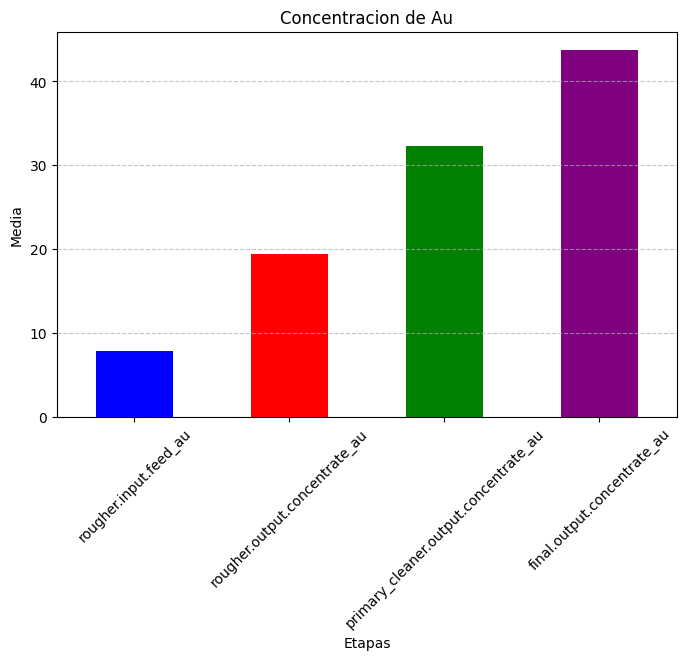

In [39]:
column_1 = ['rougher.input.feed_au', 'rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']
train_au =train[column_1].mean()
plt.figure(figsize=(8, 5))
train_au.plot(kind="bar", color=["blue", "red", "green", "purple"])
plt.title("Concentracion de Au")
plt.xlabel("Etapas")
plt.ylabel("Media")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

La concentracion del mineral Au, esta teniendo un crecimiento sostenido.

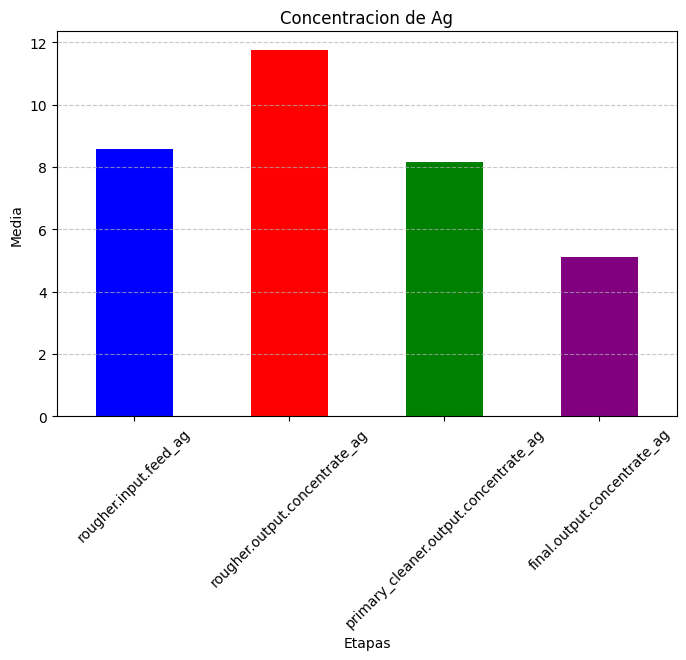

In [40]:
column_ag = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']
train_ag = train[column_ag].mean()
plt.figure(figsize=(8, 5))
train_ag.plot(kind="bar", color=["blue", "red", "green", "purple"])
plt.title("Concentracion de Ag")
plt.xlabel("Etapas")
plt.ylabel("Media")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

La media de las columnas indican que a medida que se va teniendo mas procesos en la purificacion, el nivel de concentrado de Ag va reduciendo.

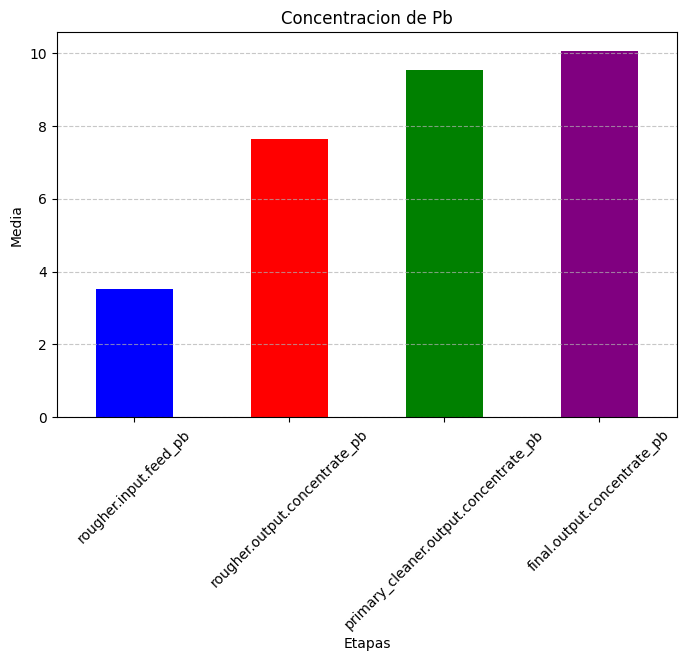

In [41]:
column_pb = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']
train_pb = train[column_pb].mean()
plt.figure(figsize=(8, 5))
train_pb.plot(kind="bar", color=["blue", "red", "green", "purple"])
plt.title("Concentracion de Pb")
plt.xlabel("Etapas")
plt.ylabel("Media")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

A medida que va pasando los procesos de flotamiento y purificacion, el plomo esta aumentando en concentración.